### purpose

see if variability in scores tracks with score in 2-trait sims

In [2]:
from pythonimports import *
from myfigs import save_pdf

import MVP_summary_functions as mvp

import seaborn as sns
import matplotlib.colors as mcolors

# fig_dir = '/work/lotterhos/brandon/tmp'
summarydir = '/work/lotterhos/MVP-Offsets/run_20220919/summaries'
fig_dir = makedir(f'{summarydir}/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la')

t0 = dt.now()  # notebook timer

mvp.latest_commit()
session_info.show()

#########################################################
Today:	January 03, 2024 - 11:39:34 EST
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 419895d157c97717f835390196c13cf973d25eba  
Merge: e20434f 1e09b6c  
Author: Brandon Lind <lind.brandon.m@gmail.com>

Current commit of MVP_offsets:
commit c5bc403582e5bafc1036be8cd2a4bb0b4d154623  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Mon Dec 18 14:38:19 2023 -0500
#########################################################



# get data

In [3]:
# get performance data
all_data = mvp.combine_level_dicts(
    use_bcs_data=False,
    keep_nuisance=False
)

all_data.keys()

filtering criteria:
	use_bcs_data = False
	performance = garden_performance
	num_traits = None
	ntraits = None
	marker_set = None
	remove_structcrxn = False
	keep_nuisance = False
	remove_rda_outliers = True


reading reps: 100%|███████████████| 10/10 [00:24<00:00,  2.45s/it]


0-225
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


225-450
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


450-675
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


675-900
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


900-1125
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1125-1350
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1350-1575
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1575-1800
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1800-2025
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


2025-2250
	 RONA num seeds =  225
	 lfmm2 num seeds =  22

dict_keys(['RONA', 'lfmm2', 'GF', 'rda'])

In [4]:
def get_stat(scores, apply=np.std, num_traits=2, **kwargs):
    """Get std for each.

    similar to mvp.subset_data_scores
    """
    data = {}
    for program in scores.keys():
        df = mvp.subset_dataframe(scores[program].copy(), num_traits=num_traits, **kwargs)
        print(program, df.seed.value_counts().unique())  # Counter(df.seed)[seed])

        if program == 'RONA':
            for env in ['sal_opt', 'temp_opt']:
                dfenv = df[df['env']==env].copy()

                if apply is not None:
                    data[f'RONA-{env}'] = dfenv.groupby('seed')['score'].apply(apply)
                else:
                    data[f'RONA-{env}'] = dfenv['score']

        elif program == 'rda':
            for structcorr in df.program.unique():
                structdf = df[df.program == structcorr].copy()

                if apply is not None:
                    data[structcorr] = structdf.groupby('seed')['score'].apply(apply)
                else:
                    data[structcorr] = structdf['score']
        else:
            if apply is not None:
                data[program] = df.groupby('seed')['score'].apply(apply)  # median score for each seed
            else:
                data[program] = df['score']

    return data

In [5]:
# get standard deviation of garden scores
data_std = {}
for marker_set in mvp.hue_order['marker_set']:
    print(f'\n{marker_set = }')
    data_std[marker_set] = get_stat(all_data,
                                    marker_set=marker_set,
                                    apply=np.std,
                                    keep_nuisance=False)


marker_set = 'adaptive'
RONA [200]
lfmm2 [100]
GF [100]
rda [200]

marker_set = 'all'
RONA [200]
lfmm2 [100]
GF [100]
rda [200]

marker_set = 'neutral'
RONA [200]
lfmm2 [100]
GF [100]
rda [200]


In [6]:
# get median score across gardens
data_med = {}
for marker_set in mvp.hue_order['marker_set']:
    print(f'\n{marker_set = }')
    data_med[marker_set] = mvp.subset_data_scores(all_data,
                                                  num_traits=2,
                                                  marker_set=marker_set,
                                                  keep_nuisance=False)


marker_set = 'adaptive'
RONA [200]
lfmm2 [100]
GF [100]
rda [200]

marker_set = 'all'
RONA [200]
lfmm2 [100]
GF [100]
rda [200]

marker_set = 'neutral'
RONA [200]
lfmm2 [100]
GF [100]
rda [200]


In [7]:
# get variance of garden scores
data_var = {}
for marker_set in mvp.hue_order['marker_set']:
    print(f'\n{marker_set = }')
    data_var[marker_set] = get_stat(all_data,
                                    num_traits=2,
                                    marker_set=marker_set,
                                    apply=np.var,
                                    keep_nuisance=False)


marker_set = 'adaptive'
RONA [200]
lfmm2 [100]
GF [100]
rda [200]

marker_set = 'all'
RONA [200]
lfmm2 [100]
GF [100]
rda [200]

marker_set = 'neutral'
RONA [200]
lfmm2 [100]
GF [100]
rda [200]


### bin local adaptation

In [8]:
params = mvp.read_params_file()

for num_bins in [3, 4, 5, 6]:
    bin_col = f'final_la_bin_{num_bins-1}'
    
    color_map = sns.color_palette("ch:s=-.2, r=.6", n_colors=num_bins)[:-1]
    
    params[bin_col] = np.nan
    
    labels = []
    for x in np.linspace(params.final_LA.min(), params.final_LA.max(), num_bins)[1:]:
        current_bin = round(x, 2)

        if len(labels) == 0:
            label = f'%s < LA ≤ {current_bin}' % params.final_LA.round(2).min()
        else:
            label = f'{last_bin} < LA ≤ {current_bin}'

        last_bin = current_bin

        print(label)

        params.loc[(params.final_LA <= x) & (params[bin_col].isnull()), bin_col] = label

        mvp.boxplot_kwargs['palette'][label] = mcolors.rgb2hex(color_map[len(labels)])

        labels.append(label)
        
    print(f'{bin_col} = {labels}')
    
    # add metadata
    mvp.hue_order[bin_col] = labels  #[::-1]

    # add metadata
    for label in labels:
        mvp.factor_names[label] = label

    # add metadata
    mvp.factor_names[bin_col] = 'Local Adaptation (ΔSA)'
    
params.head()

100%|███████████████| 2250/2250 [00:02<00:00, 855.69it/s]


0.25 < LA ≤ 0.42
0.42 < LA ≤ 0.58
final_la_bin_2 = ['0.25 < LA ≤ 0.42', '0.42 < LA ≤ 0.58']
0.25 < LA ≤ 0.36
0.36 < LA ≤ 0.47
0.47 < LA ≤ 0.58
final_la_bin_3 = ['0.25 < LA ≤ 0.36', '0.36 < LA ≤ 0.47', '0.47 < LA ≤ 0.58']
0.25 < LA ≤ 0.33
0.33 < LA ≤ 0.42
0.42 < LA ≤ 0.5
0.5 < LA ≤ 0.58
final_la_bin_4 = ['0.25 < LA ≤ 0.33', '0.33 < LA ≤ 0.42', '0.42 < LA ≤ 0.5', '0.5 < LA ≤ 0.58']
0.25 < LA ≤ 0.32
0.32 < LA ≤ 0.38
0.38 < LA ≤ 0.45
0.45 < LA ≤ 0.51
0.51 < LA ≤ 0.58
final_la_bin_5 = ['0.25 < LA ≤ 0.32', '0.32 < LA ≤ 0.38', '0.38 < LA ≤ 0.45', '0.45 < LA ≤ 0.51', '0.51 < LA ≤ 0.58']


,level,reps,arch,demog_name,demog_level_sub,demog_level,MIG_x,MIG_y,xcline,ycline,demog,METAPOP_SIDE_x,METAPOP_SIDE_y,Nequal,isVariableM,MIG_breaks,arch_level_sub,arch_level,MU_base,MU_QTL_proportion,SIGMA_QTN_1,SIGMA_QTN_2,SIGMA_K_1,SIGMA_K_2,N_traits,ispleiotropy,seed,final_LA,glevel,plevel,pleio,slevel,landscape,popsize,migration,landscape-slevel,final_la_bin_2,final_la_bin_3,final_la_bin_4,final_la_bin_5
1231094,highly-polygenic_1-trait__Est-Clines_N-cline-c...,1,highly-polygenic_1-trait,Est-Clines_N-cline-center-to-edge_m-constant,N-cline-center-to-edge_m-constant,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,4,0,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231094,0.500854,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-center-to-edge,m-constant,Est-Clines_1-trait,0.42 < LA ≤ 0.58,0.47 < LA ≤ 0.58,0.5 < LA ≤ 0.58,0.45 < LA ≤ 0.51
1231095,highly-polygenic_1-trait__Est-Clines_N-cline-N...,1,highly-polygenic_1-trait,Est-Clines_N-cline-N-to-S_m-constant,N-cline-N-to-S_m-constant,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,2,0,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231095,0.505075,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,Est-Clines_1-trait,0.42 < LA ≤ 0.58,0.47 < LA ≤ 0.58,0.5 < LA ≤ 0.58,0.45 < LA ≤ 0.51
1231096,highly-polygenic_1-trait__Est-Clines_N-equal_m...,1,highly-polygenic_1-trait,Est-Clines_N-equal_m_breaks,N-equal_m_breaks,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,0,0,1,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231096,0.499265,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-equal,m-breaks,Est-Clines_1-trait,0.42 < LA ≤ 0.58,0.47 < LA ≤ 0.58,0.5 < LA ≤ 0.58,0.45 < LA ≤ 0.51
1231097,highly-polygenic_1-trait__Est-Clines_N-equal_m...,1,highly-polygenic_1-trait,Est-Clines_N-equal_m-constant,N-equal_m-constant,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,0,0,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231097,0.499365,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-equal,m-constant,Est-Clines_1-trait,0.42 < LA ≤ 0.58,0.47 < LA ≤ 0.58,0.5 < LA ≤ 0.58,0.45 < LA ≤ 0.51
1231098,highly-polygenic_1-trait__Est-Clines_N-variabl...,1,highly-polygenic_1-trait,Est-Clines_N-variable_m-variable,N-variable_m-variable,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,3,1,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231098,0.501054,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-variable,m-variable,Est-Clines_1-trait,0.42 < LA ≤ 0.58,0.47 < LA ≤ 0.58,0.5 < LA ≤ 0.58,0.45 < LA ≤ 0.51


In [9]:
mvp.markers

{'RONA-sal_opt': '<',
 'RONA-temp_opt': '^',
 'lfmm2': 'p',
 'GF': 'o',
 'rda-nocorr': 's',
 'rda-structcorr': 'D',
 'Est-Clines': '3',
 'SS-Clines': '+',
 'SS-Mtn': 'x',
 'Est-Clines_1-trait': '3',
 'Est-Clines_equal-S': '3',
 'Est-Clines_unequal-S': '3',
 'SS-Clines_1-trait': '+',
 'SS-Clines_equal-S': '+',
 'SS-Clines_unequal-S': '+',
 'SS-Mtn_1-trait': 'x',
 'SS-Mtn_equal-S': 'x',
 'SS-Mtn_unequal-S': 'x'}

### load local adaptation

In [10]:
# created in 02_analysis/02_main_questions/00_estimate_var_LA.ipynb
pop_la_dfs = {}
for f in fs('/home/b.lind/offsets', startswith='pop_', endswith='_local_adaptation.txt'):
    la_type = op.basename(f).split("_")[1]
    
    print(ColorText(la_type).bold())

    pop_la_dfs[la_type] = pd.read_table(f, index_col=0)
    
    display(pop_la_dfs[la_type])

home-away


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1231094,0.670733,0.646905,0.669739,0.649250,0.643735,0.655245,0.632993,0.590359,0.615083,0.526406,0.505917,0.551525,0.522348,0.561656,0.536193,0.559289,0.539436,0.541522,0.509246,0.504307,0.497126,0.490664,0.488885,0.478090,0.475465,0.480895,0.484853,0.485389,0.489313,0.461021,0.450333,0.449458,0.442918,0.441097,0.444173,0.434505,0.436909,0.433164,0.434532,0.416254,0.420953,0.417978,0.419514,0.430914,0.422398,0.416504,0.423584,0.423255,0.429093,0.407555,0.406675,0.430079,0.427217,0.423880,0.425615,0.419655,0.419762,0.418373,0.416407,0.398898,0.420893,0.447202,0.438280,0.444450,0.446420,0.446032,0.442728,0.441011,0.435038,0.401028,0.486822,0.479106,0.470709,0.486994,0.475791,0.469185,0.472061,0.449470,0.468061,0.463487,0.538832,0.530552,0.539752,0.518107,0.526344,0.561515,0.560433,0.554113,0.536062,0.521009,0.660980,0.629590,0.598272,0.641872,0.650857,0.643123,0.636524,0.605428,0.660218,0.641778
1231095,0.656732,0.686114,0.687303,0.672272,0.663219,0.666871,0.611360,0.673245,0.605447,0.605434,0.579667,0.574654,0.583480,0.572254,0.589824,0.584392,0.576461,0.536331,0.537215,0.475777,0.481494,0.480888,0.480852,0.490171,0.489197,0.463406,0.455404,0.479455,0.440758,0.452371,0.432152,0.439859,0.433144,0.447340,0.446828,0.447578,0.448370,0.442817,0.424552,0.433707,0.430120,0.424595,0.423538,0.425537,0.424324,0.420987,0.430031,0.414385,0.400690,0.396628,0.427305,0.423793,0.429286,0.424474,0.420031,0.415975,0.434454,0.423722,0.414655,0.406076,0.436362,0.443702,0.444443,0.446533,0.442914,0.443370,0.444485,0.435910,0.441677,0.419781,0.478288,0.482225,0.484133,0.478329,0.484034,0.482838,0.481110,0.484584,0.477215,0.474495,0.540782,0.534714,0.547839,0.540143,0.539407,0.546327,0.543237,0.547802,0.552359,0.532777,0.630030,0.622760,0.633480,0.624086,0.630947,0.614849,0.624142,0.632483,0.601604,0.602254
1231096,0.615912,0.621110,0.626478,0.629623,0.625628,0.633429,0.621818,0.613821,0.630609,0.596385,0.547136,0.549917,0.538125,0.542857,0.543850,0.558272,0.535237,0.554138,0.554122,0.543995,0.489239,0.476774,0.477878,0.492533,0.477910,0.483365,0.489531,0.487821,0.482623,0.479328,0.448343,0.440862,0.437532,0.440959,0.447542,0.439705,0.443924,0.435531,0.427181,0.412912,0.429744,0.432309,0.428267,0.424322,0.423075,0.431370,0.424672,0.423171,0.425555,0.400372,0.423623,0.426340,0.421331,0.422477,0.428797,0.427433,0.418735,0.425939,0.419755,0.404806,0.436891,0.451779,0.432132,0.439990,0.420665,0.433506,0.444622,0.431351,0.427110,0.406922,0.481033,0.470036,0.472569,0.454796,0.479334,0.466205,0.472868,0.469142,0.478937,0.483317,0.549105,0.561342,0.539545,0.549472,0.554700,0.533846,0.549064,0.537070,0.524728,0.520058,0.601850,0.622069,0.630850,0.608616,0.618528,0.598902,0.612792,0.598700,0.624887,0.581141
1231097,0.636040,0.611810,0.639919,0.622352,0.618658,0.605645,0.625232,0.619179,0.631007,0.614218,0.539051,0.532271,0.544069,0.541991,0.553054,0.557721,0.539310,0.540874,0.538628,0.506879,0.476761,0.480320,0.482444,0.478066,0.462275,0.467736,0.489752,0.474634,0.485457,0.468262,0.436075,0.438542,0.445658,0.443111,0.447700,0.439524,0.446891,0.432573,0.429751,0.424443,0.433352,0.427721,0.424114,0.420244,0.421752,0.424128,0.425645,0.421484,0.425191,0.401934,0.411735,0.429381,0.417877,0.424613,0.414867,0.432330,0.425647,0.416470,0.427314,0.423342,0.439906,0.448489,0.445185,0.454130,0.441448,0.436564,0.435883,0.449546,0.443514,0.422238,0.475275,0.480957,0.475459,0.467587,0.481639,0.472033,0.472228,0.486156,0.488814,0.461641,0.528776,0.546059,0.547735,0.546000,0.529230,0.559014,0.529198,0.547451,0.537464,0.522892,0.632416,0.625404,0.630861,0.600939,0.617814,0.635820,0.627125,0.608088,0.572963,0.595504
1231098,0.620525,0.623390,0.614807,0.630053,0.632991,0.655403,0.628759,0.61

local-foreign


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1231094,0.658017,0.649082,0.647677,0.648067,0.639580,0.659807,0.637250,0.620574,0.647344,0.598437,0.521580,0.545369,0.535926,0.544204,0.544972,0.542711,0.549203,0.538571,0.530185,0.532176,0.489001,0.486930,0.473090,0.466929,0.467531,0.475651,0.472100,0.477484,0.470644,0.445749,0.431448,0.436009,0.427239,0.430572,0.434989,0.424602,0.427270,0.417833,0.419947,0.397375,0.411168,0.406235,0.410154,0.420520,0.411426,0.405060,0.412732,0.412900,0.417271,0.394802,0.398388,0.423794,0.420349,0.416522,0.418692,0.412220,0.412867,0.411667,0.408009,0.389229,0.424401,0.451390,0.436353,0.443550,0.441527,0.445407,0.438912,0.440816,0.432261,0.405795,0.489229,0.487739,0.474904,0.492604,0.481117,0.477954,0.479952,0.468349,0.478922,0.472956,0.552366,0.555896,0.557978,0.544568,0.539177,0.558265,0.554165,0.552379,0.550790,0.509991,0.650193,0.655472,0.641012,0.653840,0.649214,0.642177,0.640988,0.633225,0.661981,0.640418
1231095,0.648788,0.653479,0.666079,0.657191,0.631611,0.663516,0.630531,0.664390,0.647211,0.632305,0.579233,0.583983,0.565957,0.578203,0.581045,0.585962,0.580421,0.565318,0.559999,0.534706,0.497508,0.487073,0.492752,0.492426,0.495311,0.475629,0.481049,0.489315,0.465494,0.474203,0.440000,0.440213,0.436039,0.444495,0.451252,0.450846,0.447306,0.445902,0.420049,0.435952,0.427254,0.422329,0.419793,0.422974,0.421190,0.418114,0.427011,0.410534,0.395941,0.388878,0.421129,0.419313,0.424397,0.419250,0.413767,0.409890,0.430880,0.418070,0.409968,0.397809,0.425179,0.438268,0.435417,0.442575,0.435042,0.440032,0.434610,0.432985,0.433336,0.411615,0.465828,0.469471,0.478027,0.475689,0.473029,0.474483,0.471008,0.475360,0.469572,0.461933,0.543687,0.537556,0.538001,0.547078,0.534192,0.547882,0.541149,0.540335,0.542479,0.525626,0.630646,0.624444,0.630877,0.634074,0.626951,0.625560,0.632915,0.634984,0.614589,0.619740
1231096,0.634458,0.634086,0.635857,0.642654,0.638827,0.634386,0.633544,0.634470,0.638899,0.624338,0.544784,0.552616,0.549234,0.540854,0.545595,0.553037,0.541340,0.551553,0.545211,0.534928,0.487814,0.470004,0.480195,0.489594,0.479058,0.483314,0.483348,0.484491,0.471067,0.472685,0.445807,0.437053,0.430004,0.436885,0.440159,0.436408,0.436834,0.434357,0.425791,0.416802,0.422420,0.424590,0.421441,0.415197,0.415114,0.424040,0.416181,0.414725,0.416627,0.390918,0.412782,0.416201,0.411076,0.413323,0.420972,0.420603,0.409175,0.417928,0.412363,0.393961,0.429782,0.444751,0.429862,0.432474,0.419059,0.428659,0.441621,0.426871,0.425351,0.399797,0.486766,0.467711,0.464552,0.456537,0.461088,0.469481,0.461492,0.460797,0.472624,0.480886,0.549628,0.558257,0.551203,0.556338,0.544962,0.545381,0.541561,0.542853,0.525952,0.525283,0.630048,0.630238,0.631618,0.622450,0.635031,0.627993,0.631547,0.630725,0.636524,0.606786
1231097,0.627068,0.619266,0.634853,0.627302,0.620626,0.619347,0.631434,0.635478,0.629211,0.624131,0.549018,0.549176,0.550451,0.542113,0.546683,0.556836,0.536555,0.532547,0.533064,0.511487,0.471603,0.482548,0.476064,0.477410,0.462763,0.469665,0.473828,0.469392,0.465099,0.456286,0.422850,0.432897,0.432155,0.434780,0.437187,0.432681,0.434256,0.425334,0.420016,0.409919,0.427898,0.421808,0.415728,0.412246,0.415146,0.418453,0.418678,0.414377,0.416764,0.390537,0.406923,0.423178,0.414030,0.418950,0.409797,0.428577,0.420557,0.411420,0.422564,0.417893,0.440101,0.446595,0.443047,0.449279,0.440482,0.436576,0.433814,0.448726,0.441026,0.419297,0.481281,0.485027,0.479820,0.473418,0.490044,0.477589,0.480323,0.483136,0.487026,0.468245,0.546191,0.554269,0.555239,0.553519,0.551526,0.550205,0.540550,0.533345,0.545411,0.524555,0.634428,0.638442,0.629113,0.628133,0.632401,0.642304,0.637233,0.629085,0.602243,0.614530
1231098,0.623008,0.639583,0.613558,0.623828,0.625780,0.644268,0.637523,0.62

In [11]:
# get std of LA
std_la = {}

for la_type, pop_la_df in pop_la_dfs.items():
    
    print(ColorText(la_type).bold())

    std_la[la_type] = pop_la_df.apply(np.std, axis=1)

    display(std_la[la_type])

home-away


1231094    0.079588
1231095    0.082049
1231096    0.072820
1231097    0.072583
1231098    0.077132
             ...   
1233339    0.089675
1233340    0.078650
1233341    0.088120
1233342    0.092473
1233343    0.096150
Length: 2250, dtype: float64

local-foreign


1231094    0.085518
1231095    0.083154
1231096    0.080664
1231097    0.078235
1231098    0.084494
             ...   
1233339    0.097878
1233340    0.097767
1233341    0.094207
1233342    0.104980
1233343    0.109658
Length: 2250, dtype: float64

In [12]:
# get variance in LA
var_la = {}
for la_type, pop_la_df in pop_la_dfs.items():
    
    print(ColorText(la_type).bold())
    
    var_la[la_type] = pop_la_df.apply(np.var, axis=1)
    
    display(var_la[la_type])

home-away


1231094    0.006334
1231095    0.006732
1231096    0.005303
1231097    0.005268
1231098    0.005949
             ...   
1233339    0.008042
1233340    0.006186
1233341    0.007765
1233342    0.008551
1233343    0.009245
Length: 2250, dtype: float64

local-foreign


1231094    0.007313
1231095    0.006915
1231096    0.006507
1231097    0.006121
1231098    0.007139
             ...   
1233339    0.009580
1233340    0.009558
1233341    0.008875
1233342    0.011021
1233343    0.012025
Length: 2250, dtype: float64

# figures

In [32]:
def create_scatter(hue='landscape', landscape='SS-Clines', x_variable='score', y_variable='score', la_type=None):
    """Create a figure for y={'score' or 'var_score' or 'std score'} and
        x={'score' or 'var_la'  or 'std_la'}.
    
    Parameters
    ----------
    hue : str
        one of mvp.hue_order keys
    landscape : str
        one of mvp.hue_order['landscape']
    x_variable : str
        one of {'score', 'var_la', 'std_la'}; a column in the med_landscape dataframe below
    y_variable : str
        one of {'score', 'var_score' 'std score'}; a column in the std_landscape dataframe below
    la_type : str
        one of {'home-away', 'local-foreign'}
    """
    fig, row_axes = plt.subplots(
        nrows=len(mvp.hue_order['program']),
        ncols=3,
        figsize=(12, 13),
        sharex=True,
        sharey=True
    )
    
    la_name = {
        'home-away' : 'ΔHA',
        'local-foreign' : 'ΔLF',
        None : ''
    }

    x_label = {
        'score' : "Median peformance (Kendall's $\\tau$)",
        'var_la' : f'var(Degree of Local Adaptation, {la_name[la_type]})',  # not used if la_type is None
        'std_la' : f'std(Degree of Local Adaptation, {la_name[la_type]})',  # not used if la_type is None
        'final_LA' : 'Local Adaptation (ΔSA)'
    }[x_variable]

    y_label = {
        'score' : "std(Performance)\n(Kendall's $\\tau$)",
        'var_score' : "var(Performance)\n(Kendall's $\\tau$)",  # not used if la_type is None
        'std_score' : "std(Performance)\n(Kendall's $\\tau$)"  # not used if la_type is None
    }[y_variable]
    
    if x_label == 'score':
        row_axes[0,0].invert_xaxis()
    
    for j, program in enumerate(mvp.hue_order['program'][::-1]):
        axes = row_axes[j]
        
        for i, marker_set in enumerate(mvp.hue_order['marker_set']):
            ax = axes[i]

            # get performance measures
            std_df = data_std[marker_set][program].to_frame()
            med_df = data_med[marker_set][program].to_frame()

            std_df[hue] = std_df.index.map(params[hue])
            med_df[hue] = med_df.index.map(params[hue])
            
            std_df['var_score'] = std_df.index.map(data_var[marker_set][program])
            
            std_df['landscape'] = std_df.index.map(params.landscape)
            med_df['landscape'] = med_df.index.map(params.landscape)
            med_df['final_LA'] = med_df.index.map(params.final_LA)
            
            if la_type is not None:
                med_df['std_la'] = med_df.index.astype(int).map(std_la[la_type])
                med_df['var_la'] = med_df.index.astype(int).map(var_la[la_type])

            for level in mvp.hue_order[hue][::-1]:

                for landscape in [landscape]:  # mvp.hue_order['landscape']:
                    std_landscape = std_df[(std_df.landscape == landscape) & (std_df[hue] == level)]
                    med_landscape = med_df[(med_df.landscape == landscape) & (med_df[hue] == level)]

                    ax.scatter(x=med_landscape[x_variable],
                               y=std_landscape[y_variable],
                               c=mvp.boxplot_kwargs['palette'][level],
                               marker=mvp.markers[landscape]
        #                        marker=std_level.index.map(params['landscape']).map(mvp.markers)
                               )
            if j == 0:
                ax.set_title(f'{marker_set}', style='italic')
            if j == len(mvp.hue_order['program']) - 1:
                ax.set_xlabel(x_label)
            if i == 0:
                ax.set_ylabel(f'{mvp.factor_names[program]}\n{y_label}')

        
        if j == 0:
            mvp.add_legend(fig, color_by=hue, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol='auto')

    save_pdf(f'{fig_dir}/{hue}_{landscape}_{x_variable}_{y_variable}_{la_type}.pdf')
    plt.show()
    
    pass

## std performance vs median performance

is variability in performance related to median performance?

ie, are pooly performing models generally more variable in performance than high performing models?

In [14]:
la_types = keys(var_la)

la_types

['home-away', 'local-foreign']

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/slevel_SS-Clines_score_score_None.pdf


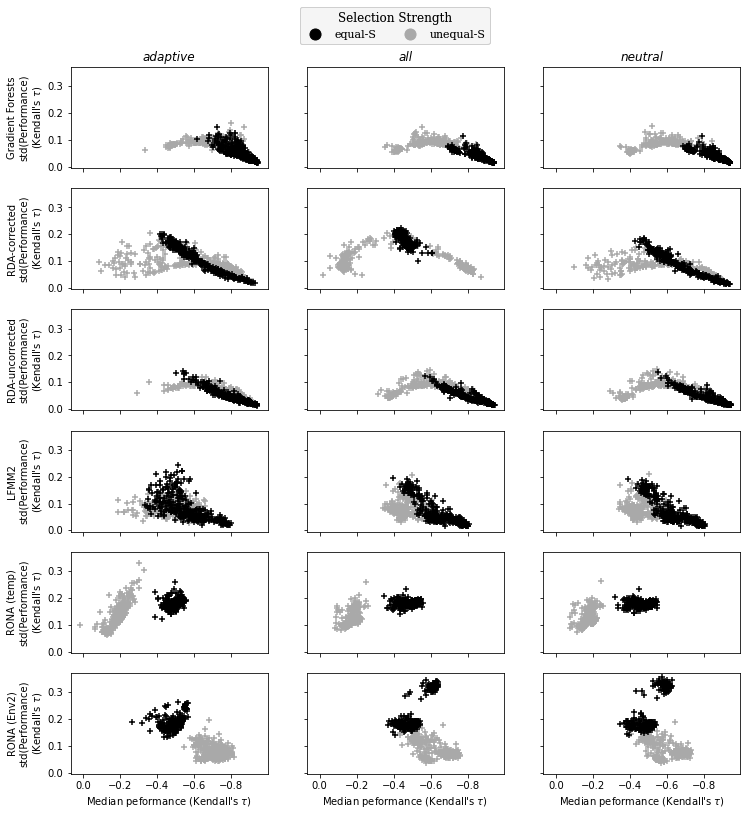

In [14]:
create_scatter(hue='slevel', landscape='SS-Clines')

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/slevel_SS-Mtn_score_score_None.pdf


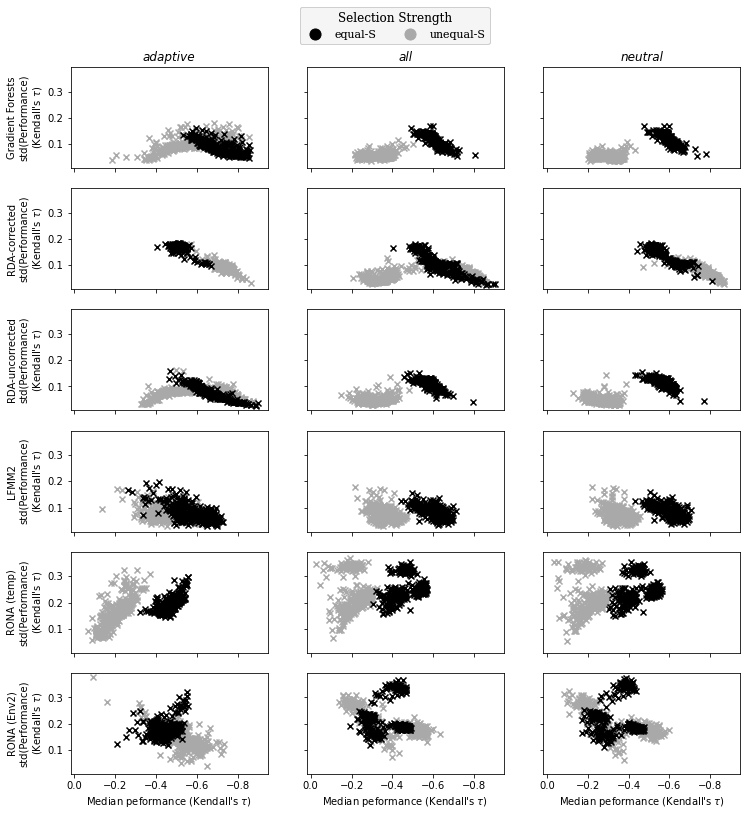

In [15]:
create_scatter(hue='slevel', landscape='SS-Mtn')

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/slevel_Est-Clines_score_score_None.pdf


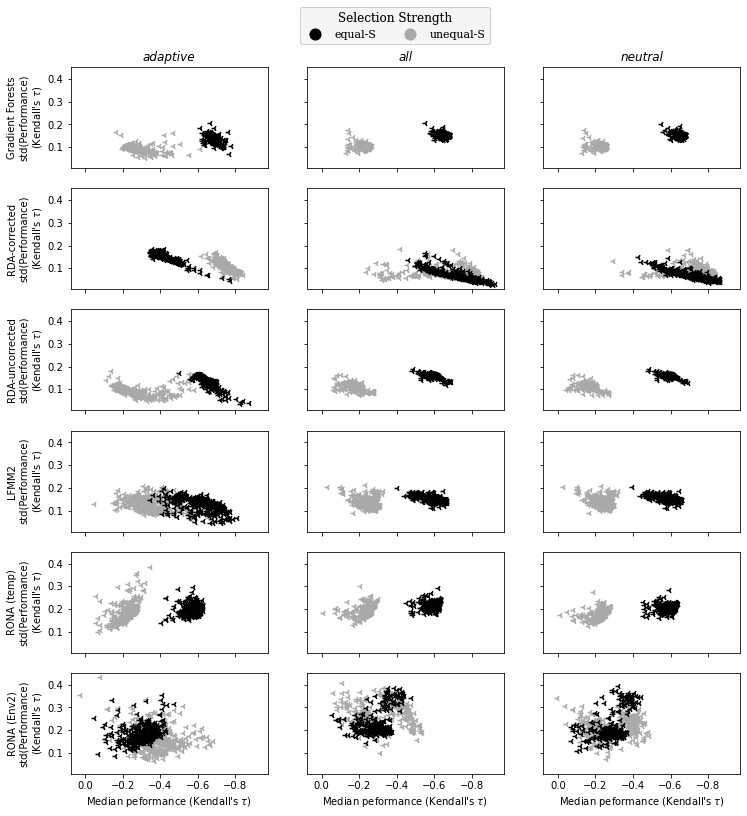

In [16]:
create_scatter(hue='slevel', landscape='Est-Clines')

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/final_la_bin_2_SS-Clines_score_score_None.pdf


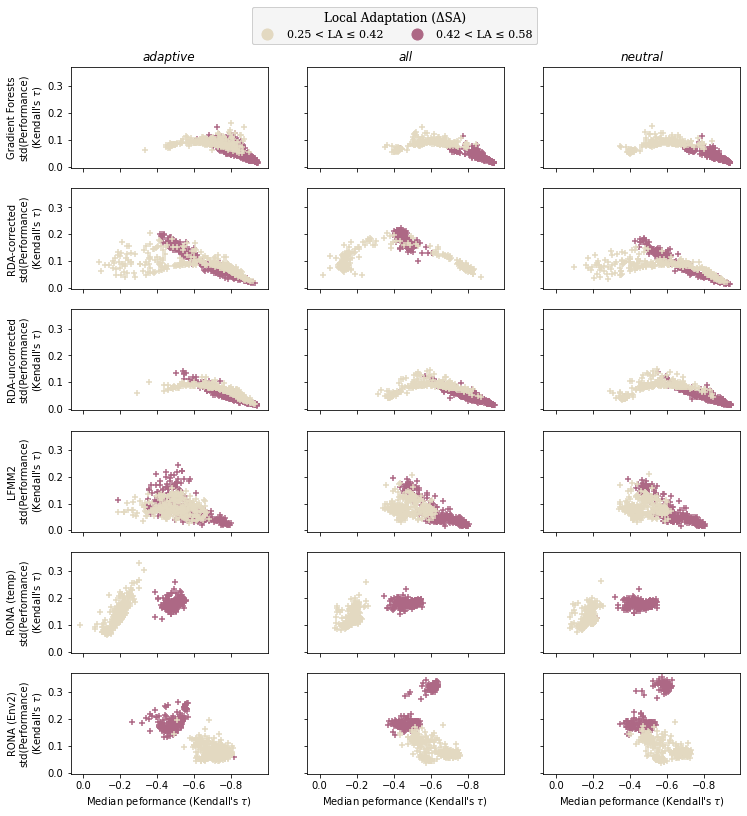

In [17]:
create_scatter(hue='final_la_bin_2', landscape='SS-Clines')

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/final_la_bin_2_SS-Mtn_score_score_None.pdf


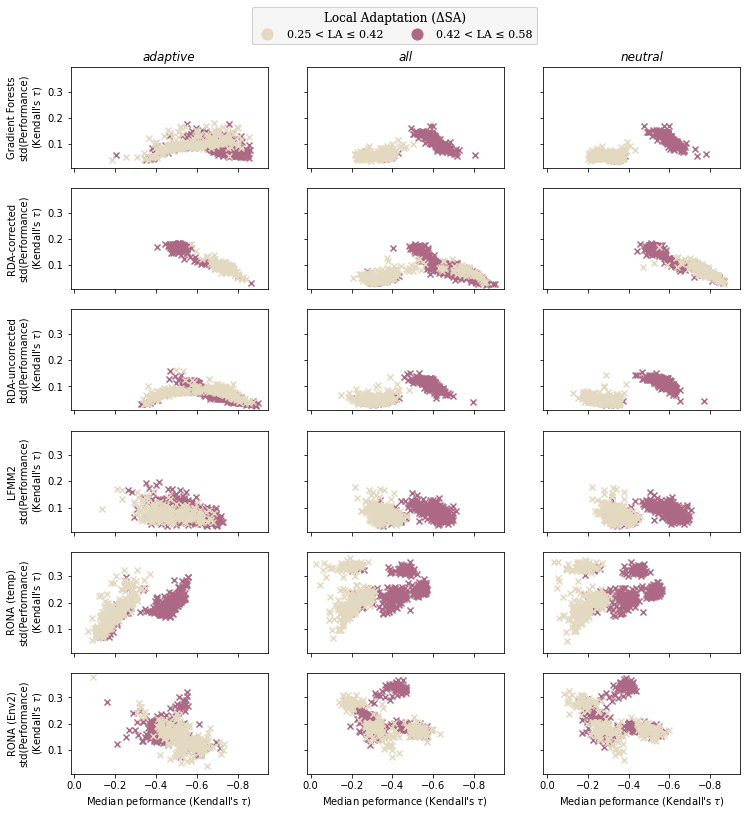

In [18]:
create_scatter(hue='final_la_bin_2', landscape='SS-Mtn')

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/final_la_bin_2_Est-Clines_score_score_None.pdf


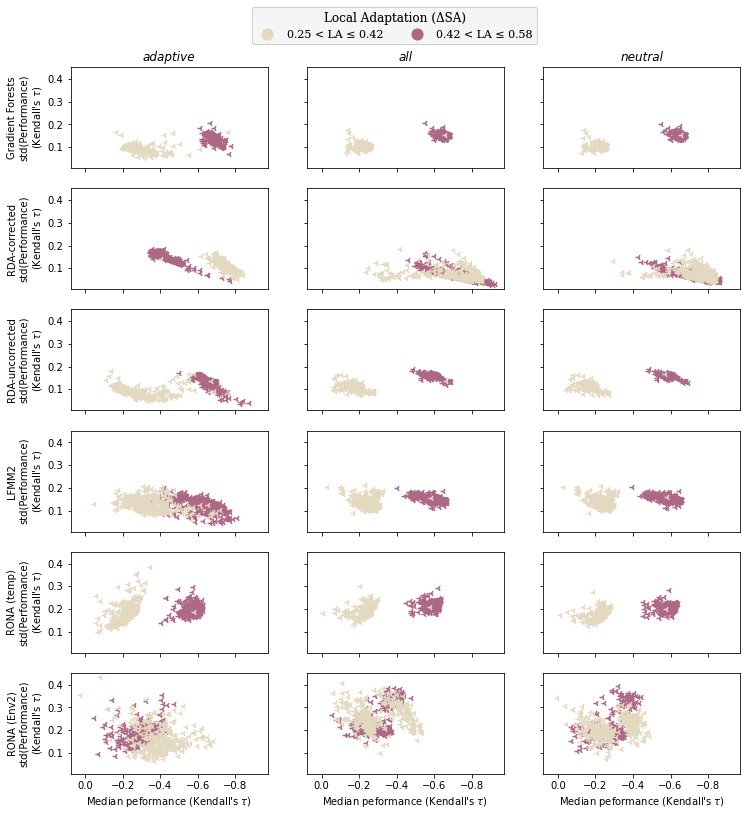

In [19]:
create_scatter(hue='final_la_bin_2', landscape='Est-Clines')

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/final_la_bin_5_SS-Clines_score_score_None.pdf


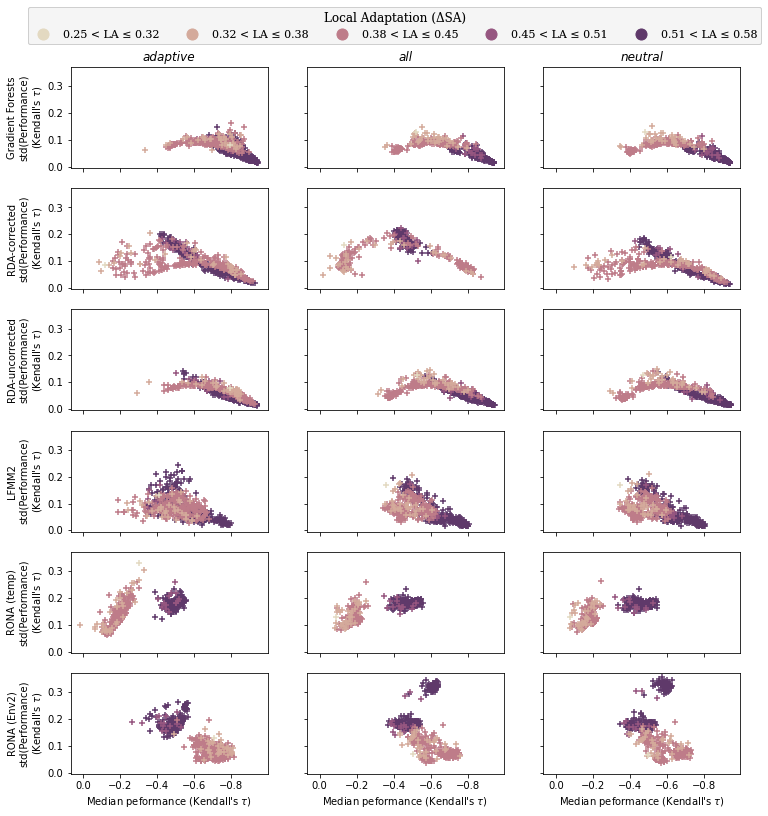

In [20]:
create_scatter(hue='final_la_bin_5', landscape='SS-Clines')

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/final_la_bin_5_Est-Clines_score_score_None.pdf


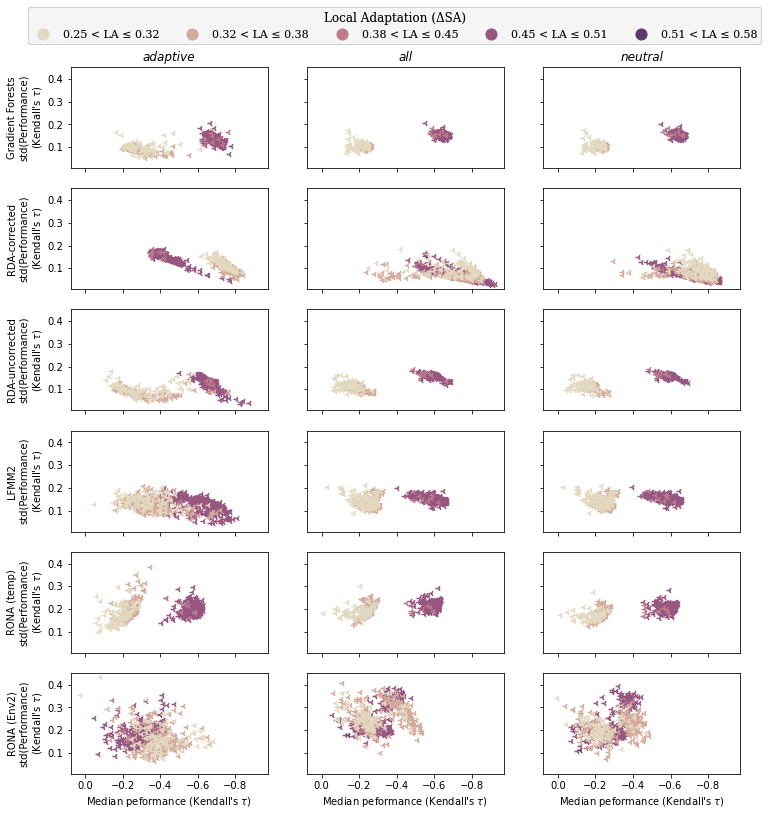

In [21]:
create_scatter(hue='final_la_bin_5', landscape='Est-Clines')

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/final_la_bin_5_SS-Mtn_score_score_None.pdf


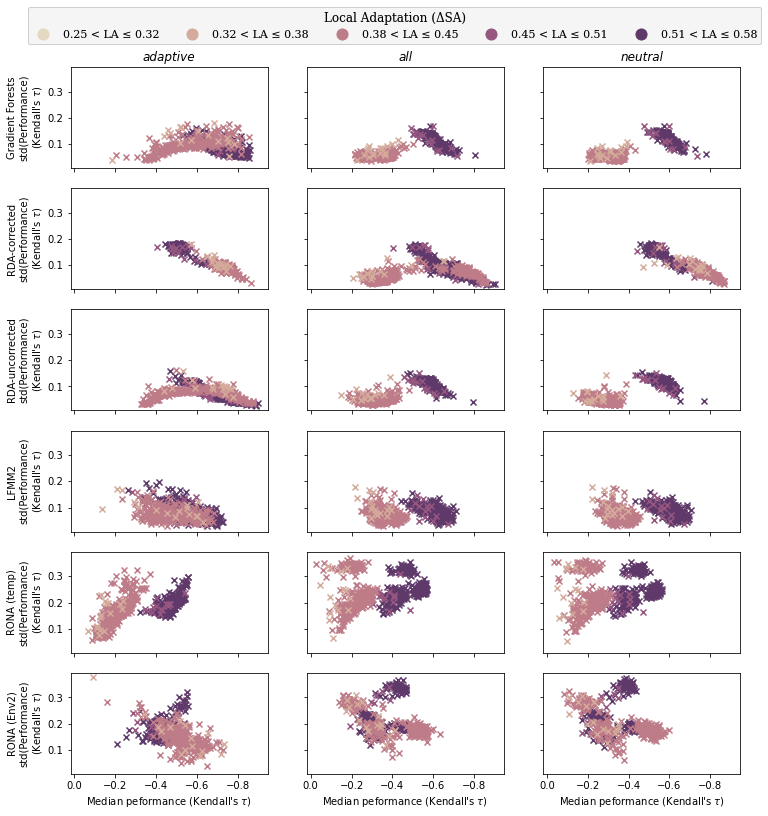

In [22]:
create_scatter(hue='final_la_bin_5', landscape='SS-Mtn')

## std performance vs std la

is variability in performance related to variability in deme-level measures of LA?

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/slevel_SS-Clines_std_la_score_home-away.pdf


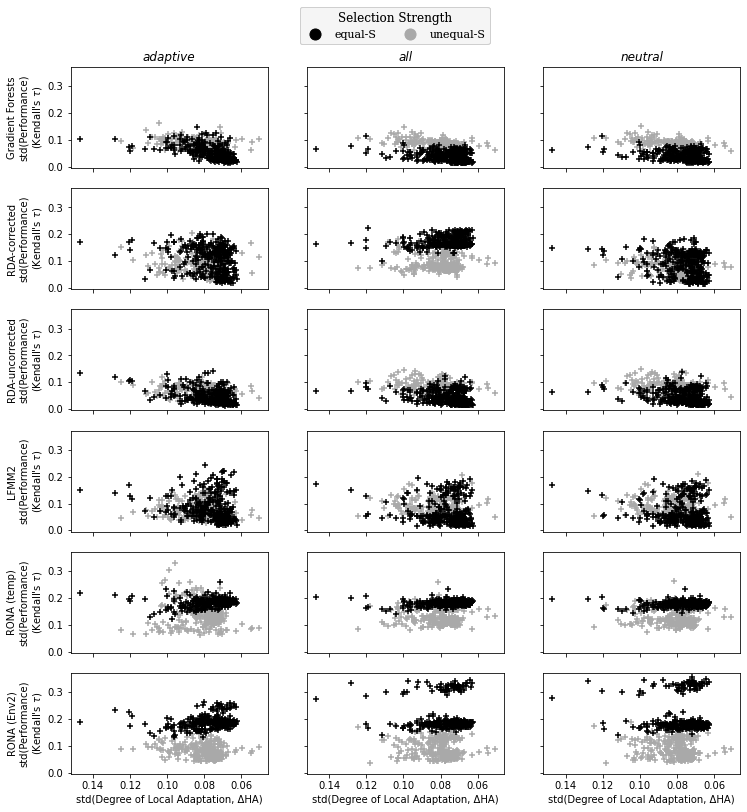

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/slevel_SS-Clines_std_la_score_local-foreign.pdf


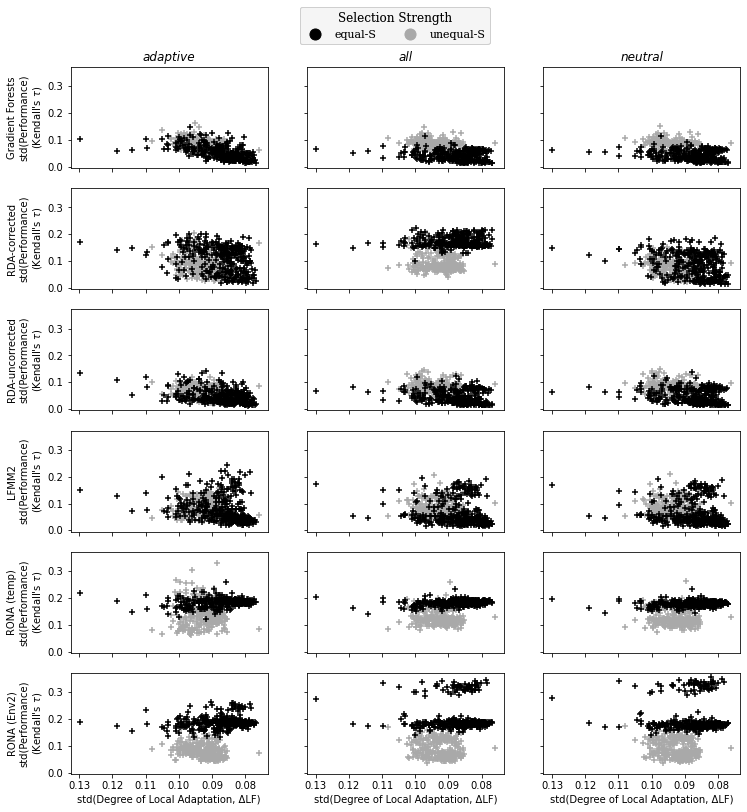

In [23]:
for la_type in la_types:
    create_scatter(hue='slevel', landscape='SS-Clines', x_variable='std_la', la_type=la_type)

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/final_la_bin_2_SS-Clines_std_la_score_home-away.pdf


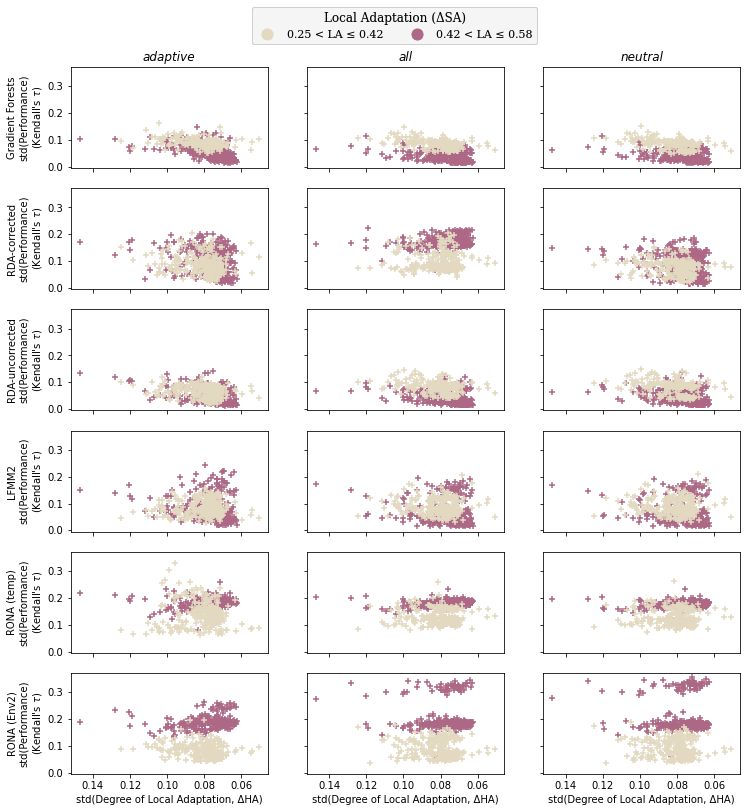

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/final_la_bin_2_SS-Clines_std_la_score_local-foreign.pdf


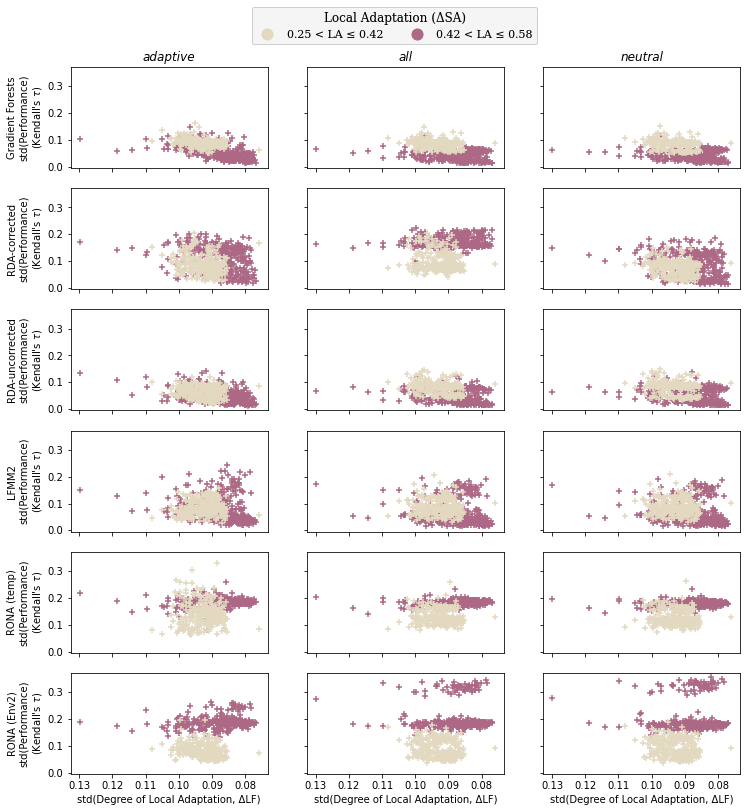

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/final_la_bin_2_SS-Mtn_std_la_score_home-away.pdf


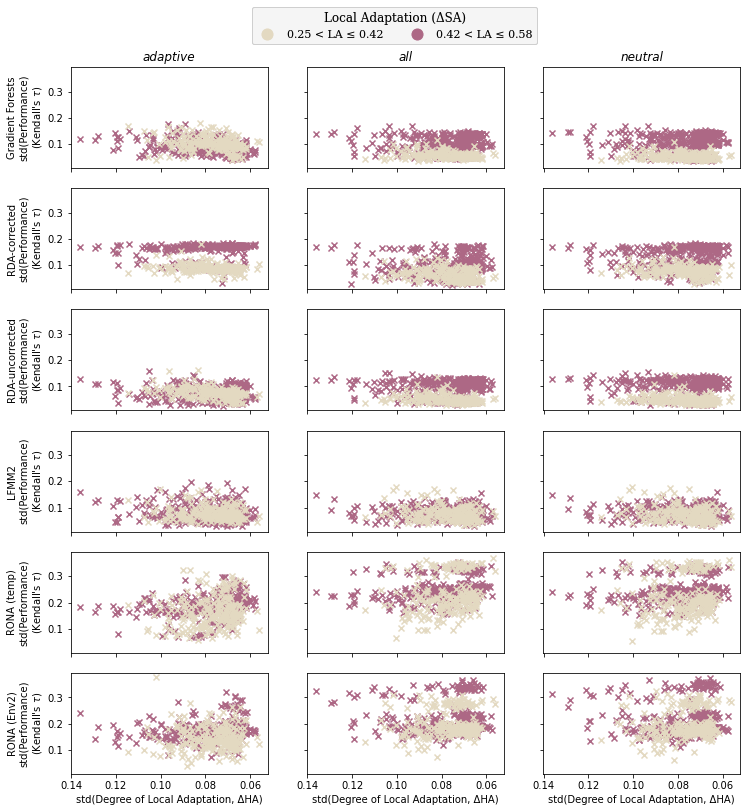

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/final_la_bin_2_SS-Mtn_std_la_score_local-foreign.pdf


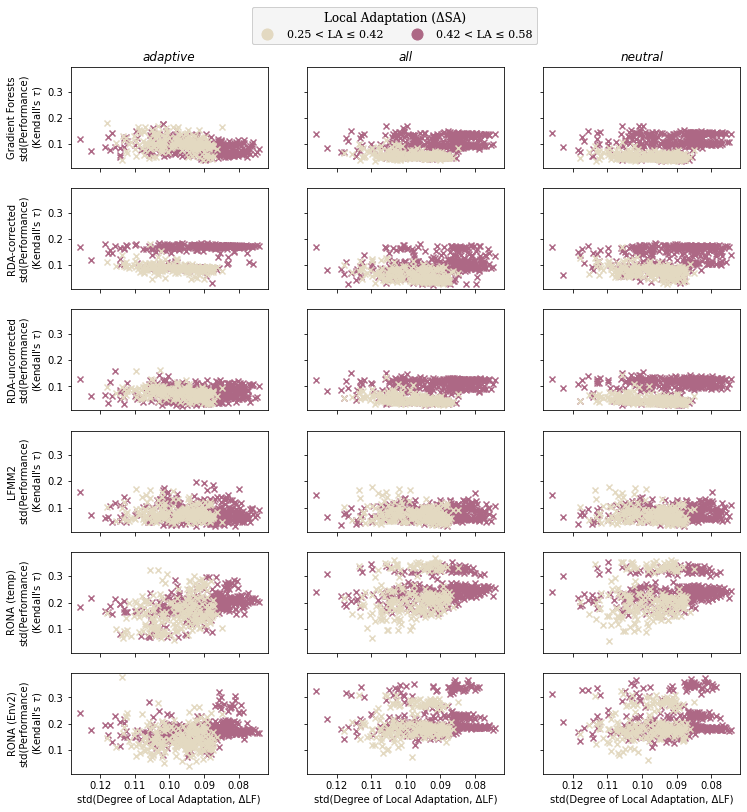

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/final_la_bin_2_Est-Clines_std_la_score_home-away.pdf


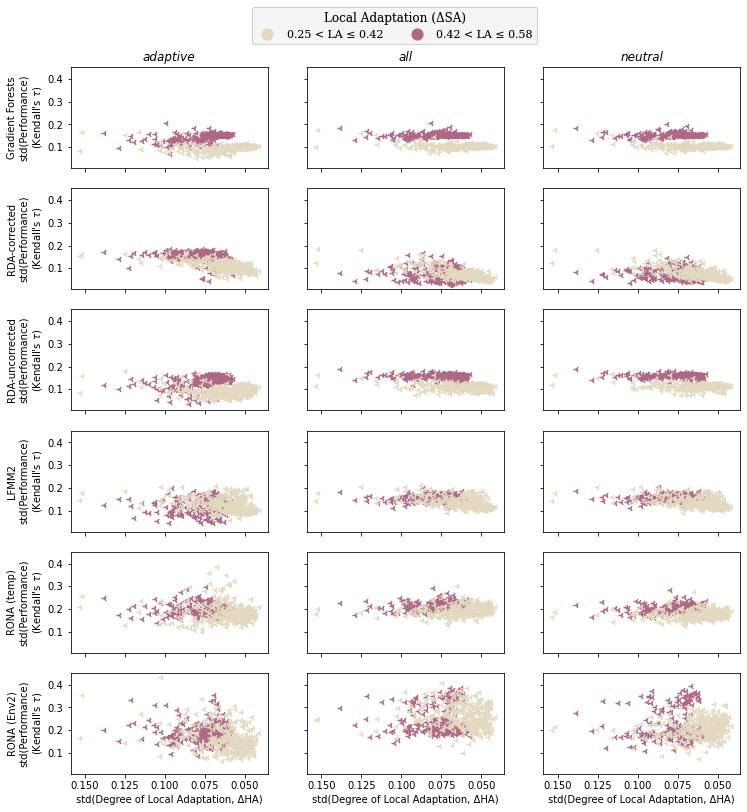

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/final_la_bin_2_Est-Clines_std_la_score_local-foreign.pdf


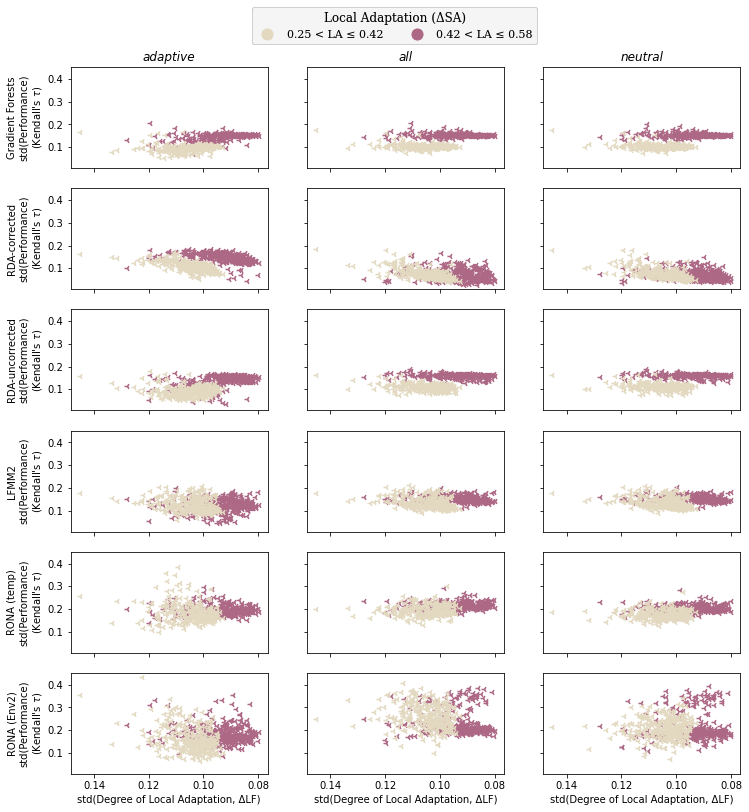

In [24]:
for landscape in mvp.hue_order['landscape']:
    for la_type in la_types:
        create_scatter(hue='final_la_bin_2', x_variable='std_la', la_type=la_type,
                       landscape=landscape)

### var peformance var la

is variability in performance related to variability in deme-level measures of LA?

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/slevel_Est-Clines_var_la_var_score_home-away.pdf


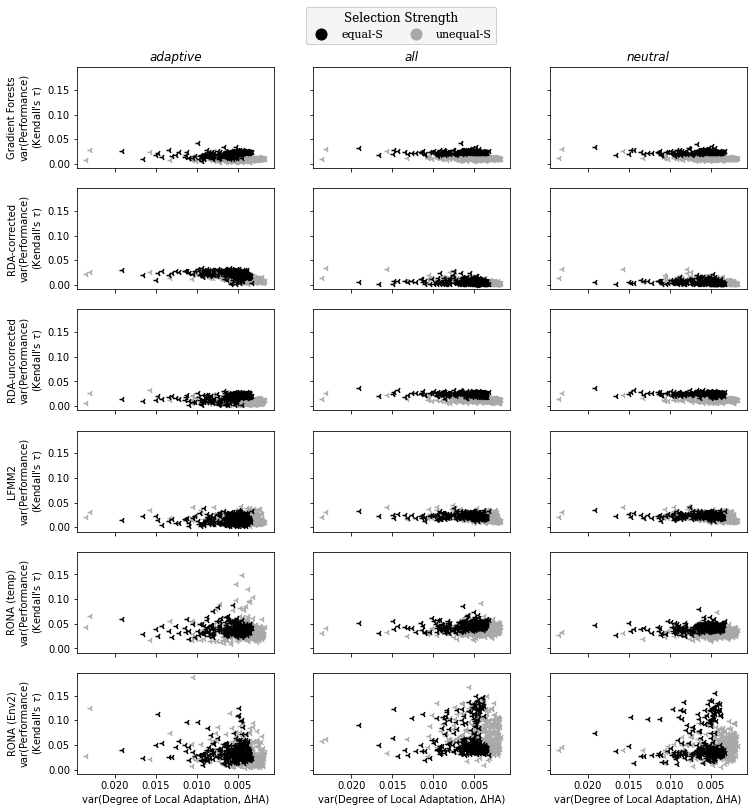

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/slevel_Est-Clines_var_la_var_score_local-foreign.pdf


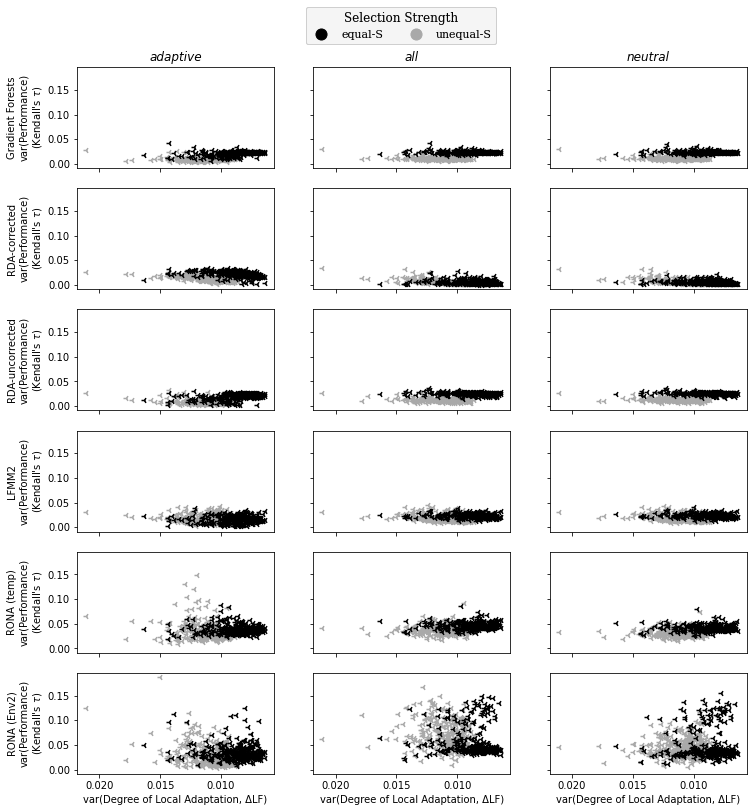

In [25]:
for la_type in la_types:
    create_scatter(hue='slevel', x_variable='var_la', y_variable='var_score',
                   landscape=landscape, la_type=la_type)

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/slevel_SS-Clines_var_la_var_score_home-away.pdf


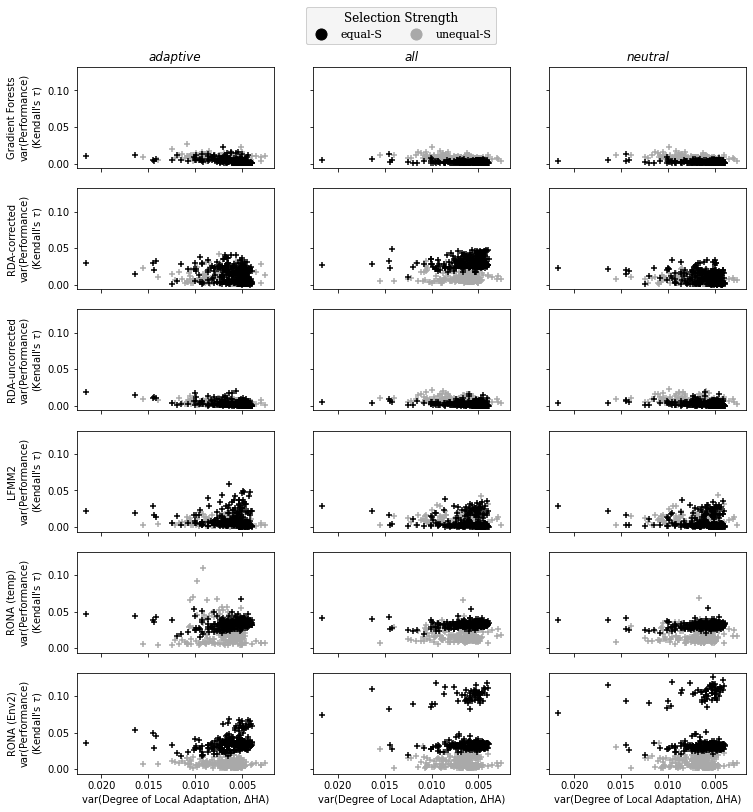

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/slevel_SS-Clines_var_la_var_score_local-foreign.pdf


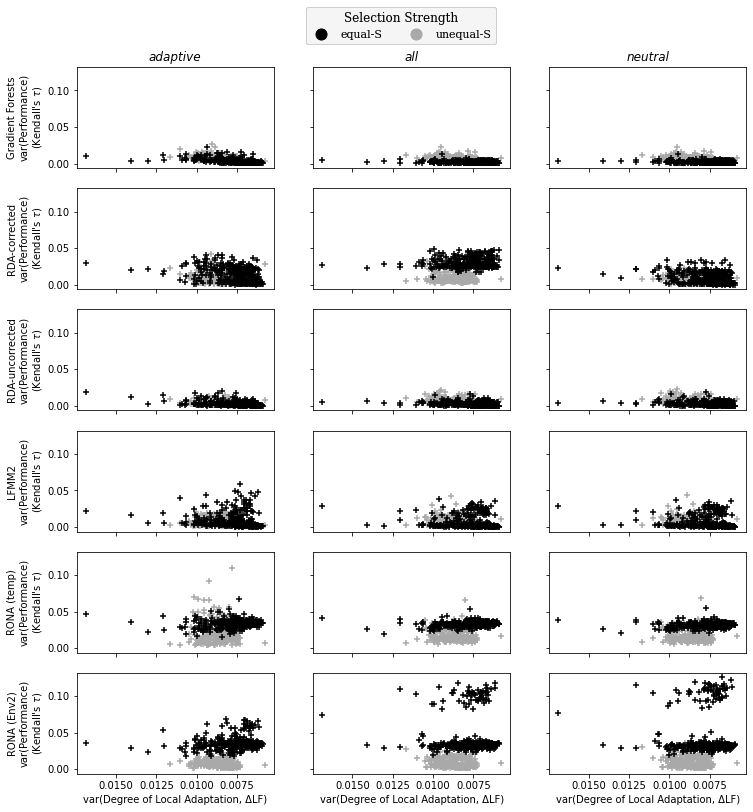

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/slevel_SS-Mtn_var_la_var_score_home-away.pdf


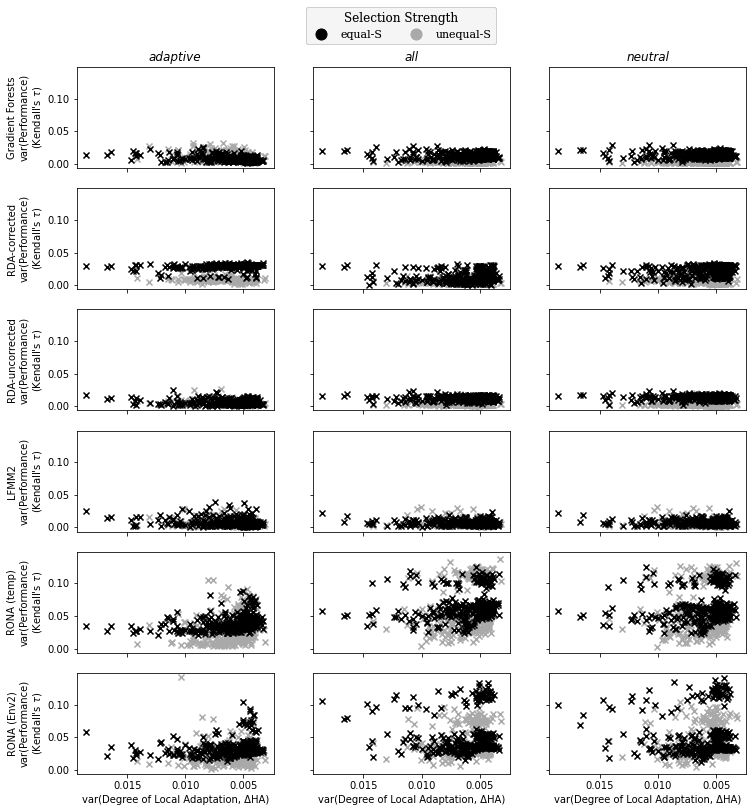

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/slevel_SS-Mtn_var_la_var_score_local-foreign.pdf


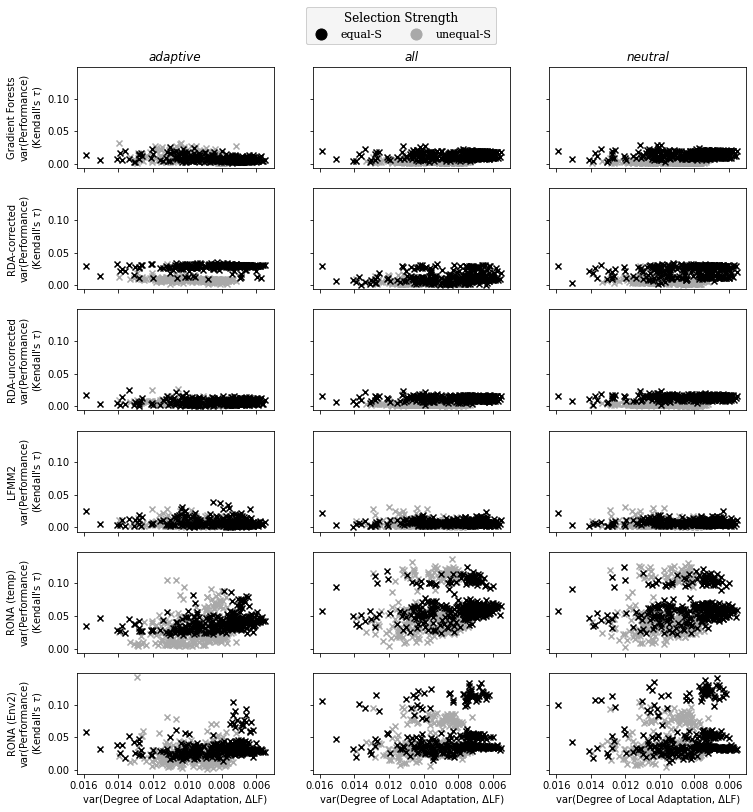

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/slevel_Est-Clines_var_la_var_score_home-away.pdf


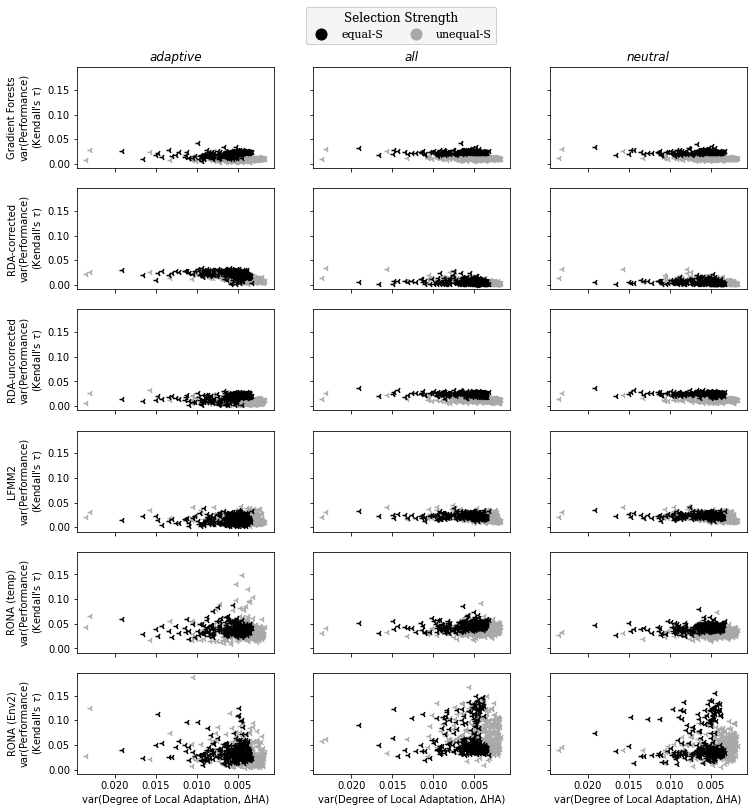

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/07_Q4_std-perf_vs_med-performance_and_std-perf_vs_std-la/slevel_Est-Clines_var_la_var_score_local-foreign.pdf


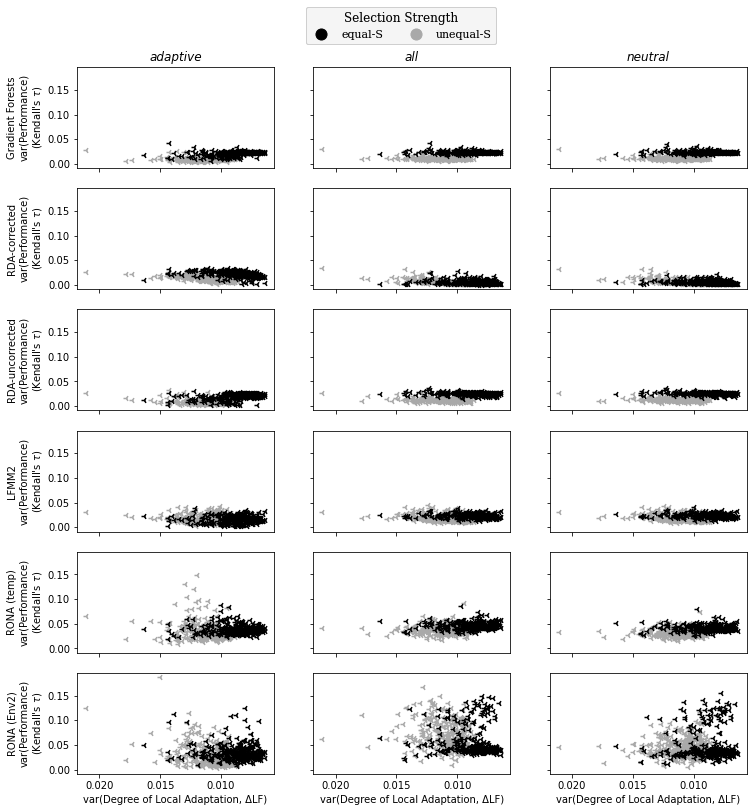

In [26]:
for landscape in mvp.hue_order['landscape']:
    for la_type in la_types:
        create_scatter(hue='slevel', x_variable='var_la', y_variable='var_score',
                       landscape=landscape, la_type=la_type)

## std performance vs LA

is variability in performance related to metapop levels of LA?

In [34]:
la_types

['home-away', 'local-foreign']

In [ ]:
for landscape in mvp.hue_order['landscape']:
    create_scatter(hue='final_la_bin_2', x_variable='final_LA', la_type='home-away', landscape=landscape)

In [27]:
formatclock(dt.now() - t0)

'0-00:02:31'